# **DataFrame**

**Load the datasets**

In [ ]:
import pandas as pd

payment_report = pd.read_csv("payment_report.csv")
product = pd.read_csv("product.csv")
transactions = pd.read_csv("transactions.csv")

# **EDA**

**Merge datasets**

In [ ]:
payment_enriched = payment_report.merge(product, on='product_id', how='left')
payment_enriched

,report_month,payment_group,product_id,source_id,volume,category,team_own
0,2023-01,payment,12,45,624110375,PXXXXXT,ASD
1,2023-01,payment,17,45,335715113,PXXXXXB,ASD
2,2023-01,payment,18,45,737784466,PXXXXXB,ASD
3,2023-01,payment,19,45,120963069,PXXXXXM2,ASD
4,2023-01,payment,20,45,319653158,PXXXXXB,ASD
...,...,...,...,...,...,...,...
914,2023-04,payment,15067,45,1504000,PXXXXXR,ASL
915,2023-04,refund,1976,37,3542271587,NaN,NaN
916,2023-04,refund,1976,38,13831708189,NaN,NaN
917,2023-04,refund,1976,39,1905435543,NaN,NaN


**Check missing values, incorrect data types, duplicates, outliers**



In [ ]:
payment_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   report_month   919 non-null    object
 1   payment_group  919 non-null    object
 2   product_id     919 non-null    int64 
 3   source_id      919 non-null    int64 
 4   volume         919 non-null    int64 
 5   category       897 non-null    object
 6   team_own       897 non-null    object
dtypes: int64(3), object(4)
memory usage: 50.4+ KB


In [ ]:
# Convert data types
payment_enriched['report_month'] = pd.to_datetime(payment_enriched['report_month'])
payment_enriched[['payment_group', 'category', 'team_own']] = payment_enriched[['payment_group', 'category', 'team_own']].astype(str)

In [ ]:
payment_enriched.describe()

,report_month,product_id,source_id,volume
count,919,919.000000,919.000000,9.190000e+02
mean,2023-02-19 06:05:05.549510400,1192.517954,44.875952,1.978574e+08
min,2023-01-01 00:00:00,3.000000,37.000000,5.500000e+03
25%,2023-02-01 00:00:00,640.000000,45.000000,1.250000e+06
50%,2023-03-01 00:00:00,1059.000000,45.000000,7.982015e+06
75%,2023-04-01 00:00:00,1585.000000,45.000000,5.447599e+07
max,2023-04-01 00:00:00,15067.000000,45.000000,1.383171e+10
std,NaN,1293.463329,0.910995,8.367595e+08


In [ ]:
payment_enriched.isnull().sum()

report_month     0
payment_group    0
product_id       0
source_id        0
volume           0
category         0
team_own         0
dtype: int64

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17741 entries, 0 to 17740
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  17741 non-null  int64  
 1   merchant_id     17740 non-null  float64
 2   volume          17740 non-null  float64
 3   transType       17740 non-null  float64
 4   transStatus     17740 non-null  float64
 5   sender_id       17118 non-null  float64
 6   receiver_id     15340 non-null  float64
 7   extra_info      107 non-null    object 
 8   timeStamp       17740 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
transactions.describe()

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,timeStamp
count,1.774100e+04,17740.000000,1.774000e+04,17740.000000,17740.000000,1.711800e+04,1.534000e+04,1.774000e+04
mean,3.002652e+09,2527.712514,2.491615e+05,6.986584,-10.901015,1.025514e+08,1.790458e+08,1.682935e+12
std,2.252267e+07,4100.727703,1.013353e+06,7.526614,52.626429,6.265593e+08,8.632999e+08,1.468882e+06
min,3.002999e+06,5.000000,1.000000e+00,2.000000,-1333.000000,1.000001e+07,0.000000e+00,1.682932e+12
25%,3.002733e+09,305.000000,1.000000e+04,2.000000,1.000000,1.005777e+07,1.408102e+05,1.682933e+12
50%,3.002849e+09,2250.000000,3.600000e+04,2.000000,1.000000,1.073757e+07,7.018400e+06,1.682935e+12
75%,3.002936e+09,2270.000000,1.000000e+05,8.000000,1.000000,2.100206e+07,3.153100e+07,1.682936e+12
max,3.003026e+09,159875.000000,5.000000e+07,30.000000,1.000000,6.993029e+09,6.999363e+09,1.682937e+12


In [ ]:
transactions.isnull().sum()

transaction_id        0
merchant_id           1
volume                1
transType             1
transStatus           1
sender_id           623
receiver_id        2401
extra_info        17634
timeStamp             1
dtype: int64

In [ ]:
transactions.dropna(subset=['sender_id', 'receiver_id', 'extra_info', 'timeStamp'])

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp
75,3002697816,2250.0,10000.0,8.0,1.0,143579086.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1.682932e+12
121,3002692713,2250.0,10000.0,8.0,1.0,38568628.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1.682932e+12
318,3002681418,2250.0,10000.0,8.0,1.0,38543687.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1.682932e+12
336,3002669631,2250.0,10000.0,8.0,1.0,38566269.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1.682932e+12
829,3002724624,2250.0,10000.0,8.0,1.0,17333942.0,38543687.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869357992...",1.682932e+12
...,...,...,...,...,...,...,...,...,...
16264,3003007821,2250.0,10000.0,8.0,1.0,10009534.0,434.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45870076038...",1.682937e+12
16924,3003024615,2250.0,10000.0,8.0,1.0,17006601.0,82691.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45870131921...",1.682937e+12
17039,3003024837,2250.0,10000.0,8.0,1.0,10009562.0,82691.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45870131921...",1.682937e+12
17078,3003024909,2250.0,10000.0,8.0,1.0,13571267.0,82691.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45870131921...",1.682937e+12


In [ ]:
# Return unique values
payment_enriched.nunique()

# Check duplicates
payment_enriched.duplicated('product_id')

# Drop duplicates
payment_enriched.drop_duplicates('product_id')

,report_month,payment_group,product_id,source_id,volume,category,team_own
0,2023-01,payment,12,45,624110375,PXXXXXT,ASD
1,2023-01,payment,17,45,335715113,PXXXXXB,ASD
2,2023-01,payment,18,45,737784466,PXXXXXB,ASD
3,2023-01,payment,19,45,120963069,PXXXXXM2,ASD
4,2023-01,payment,20,45,319653158,PXXXXXB,ASD
...,...,...,...,...,...,...,...
906,2023-04,payment,2342,45,58000,PXXXXXF,ASL
907,2023-04,payment,2390,45,266513,PXXXXXB,ASD
908,2023-04,payment,2391,45,780514086,PXXXXXT,ASD
909,2023-04,payment,2408,45,10547550,PXXXXXF,ASL


In [ ]:
transactions.nunique()
transactions.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17736    False
17737    False
17738    False
17739    False
17740    False
Length: 17741, dtype: bool

In [ ]:
# Check outliers in payment_enriched
# mean = 197,857,400; std = 836,759,500 => wide spread in data
# 75% = 54,475,990; max = 13,831,710,000 => large gap => outliers

# Identify threshold
Q1 = 1250000
Q2 = 54475990
IQR = Q2 - Q1

# Identify outliers
# Upper threshold
upper = Q2 + (1.5 * IQR)
# Lower threshold
lower = Q1 - (1.5 * IQR)

In [ ]:
# Identify outlies
df = pd.DataFrame(payment_enriched)
outliers = df[(df['volume'] < lower) | (df['volume'] > upper)]
outliers

,report_month,payment_group,product_id,source_id,volume,category,team_own
0,2023-01-01,payment,12,45,624110375,PXXXXXT,ASD
1,2023-01-01,payment,17,45,335715113,PXXXXXB,ASD
2,2023-01-01,payment,18,45,737784466,PXXXXXB,ASD
4,2023-01-01,payment,20,45,319653158,PXXXXXB,ASD
5,2023-01-01,payment,24,45,2068335003,PXXXXXM,ASL
...,...,...,...,...,...,...,...
908,2023-04-01,payment,2391,45,780514086,PXXXXXT,ASD
915,2023-04-01,refund,1976,37,3542271587,nan,nan
916,2023-04-01,refund,1976,38,13831708189,nan,nan
917,2023-04-01,refund,1976,39,1905435543,nan,nan


In [ ]:
# Drop outliers
no_outliers = df[(df['volume'] > lower) & (df['volume'] < upper)]
no_outliers.describe()

,report_month,product_id,source_id,volume
count,777,777.000000,777.000000,7.770000e+02
mean,2023-02-18 12:52:49.111969024,1271.855856,44.984556,1.779130e+07
min,2023-01-01 00:00:00,3.000000,39.000000,5.500000e+03
25%,2023-02-01 00:00:00,696.000000,45.000000,9.340000e+05
50%,2023-03-01 00:00:00,1130.000000,45.000000,4.411000e+06
75%,2023-04-01 00:00:00,1609.000000,45.000000,2.170662e+07
max,2023-04-01 00:00:00,15067.000000,45.000000,1.335352e+08
std,NaN,1363.789835,0.304212,2.766359e+07


In [ ]:
# Check outliers in transactions
# 75% = 100,000; max = 50,000,000 => large gap => outliers

# Identify threshold
Q3 = 10000
Q4 = 100000
IQR = Q4 - Q3

# Identify outliers
# Upper threshold
upper = Q4 + (1.5 * IQR)
# Lower threshold
lower = Q3 - (1.5 * IQR)

In [ ]:
# Identify outlies
df2 = pd.DataFrame(transactions)
outliers2 = df2[(df2['volume'] < lower) | (df2['volume'] > upper)]
outliers2

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp
3,3002680710,2270.0,1500000.0,2.0,1.0,1.005921e+07,59206.0,NaN,1.682932e+12
11,3001888503,7255.0,1000000.0,22.0,1.0,NaN,14008575.0,NaN,1.682932e+12
14,3002675010,2270.0,800000.0,2.0,1.0,1.700727e+07,7007266.0,NaN,1.682932e+12
24,3002675034,2270.0,1000000.0,2.0,-217.0,1.357980e+07,3579800.0,NaN,1.682932e+12
26,3002652300,2250.0,255500.0,8.0,1.0,1.033843e+07,31514448.0,NaN,1.682932e+12
...,...,...,...,...,...,...,...,...,...
17706,3002999034,2270.0,1000000.0,2.0,1.0,1.356464e+07,3564638.0,NaN,1.682937e+12
17709,3003010713,11110.0,285000.0,2.0,1.0,4.902918e+07,NaN,NaN,1.682937e+12
17726,3003022203,1205.0,300000.0,2.0,1.0,1.020894e+07,208943.0,NaN,1.682937e+12
17727,3003022206,3740.0,276416.0,2.0,1.0,1.449044e+09,NaN,NaN,1.682937e+12


In [ ]:
# Drop outliers
no_outliers2 = df2[(df2['volume'] > lower) & (df2['volume'] < upper)]
no_outliers2.describe()

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,timeStamp
count,1.500900e+04,15009.000000,15009.000000,15009.000000,15009.000000,1.453400e+04,1.324200e+04,1.500900e+04
mean,3.002821e+09,2499.745819,45303.000067,7.454727,-9.542541,9.852465e+07,1.700519e+08,1.682935e+12
std,1.761190e+05,4354.663600,54483.218650,7.700247,49.048825,6.160337e+08,8.384799e+08,1.464284e+06
min,3.001889e+09,5.000000,1.000000,2.000000,-994.000000,1.000001e+07,0.000000e+00,1.682932e+12
25%,3.002731e+09,305.000000,5000.000000,2.000000,1.000000,1.005445e+07,1.535695e+05,1.682933e+12
50%,3.002848e+09,2250.000000,20000.000000,2.000000,1.000000,1.101438e+07,7.035189e+06,1.682935e+12
75%,3.002936e+09,2270.000000,64000.000000,8.000000,1.000000,2.101477e+07,3.154164e+07,1.682936e+12
max,3.003026e+09,159875.000000,234000.000000,30.000000,1.000000,6.993029e+09,6.999363e+09,1.682937e+12




```
# This is formatted as code
```

**Explore relationships across numerical, categorical, and DateTime data**

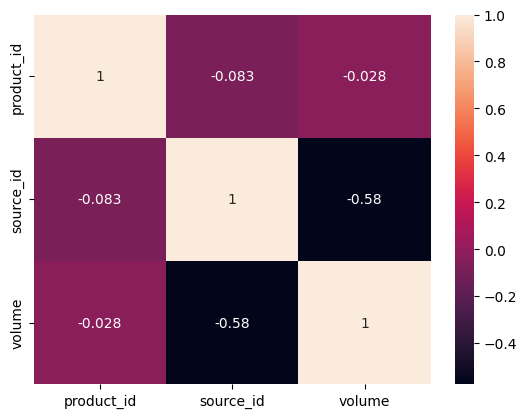

In [ ]:
# payment_enriched
import seaborn as sns

numeric_columns = payment_enriched.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_columns.corr(), annot=True)

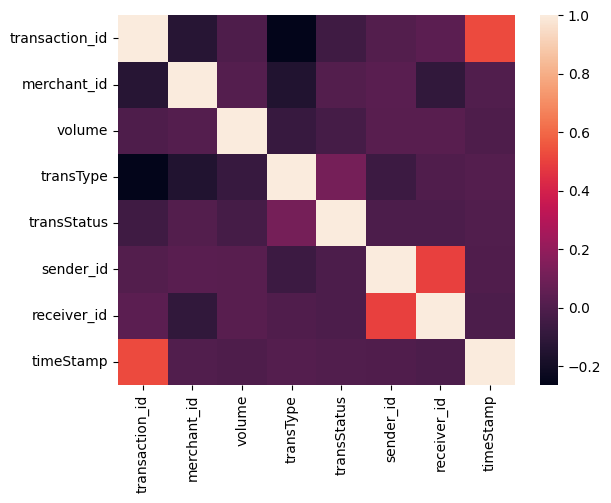

In [ ]:
# transactions
import seaborn as sns

numeric_columns = transactions.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_columns.corr())

# **Data Wrangling**

**Top monthly products and categories**

In [ ]:
# Monthly volume for each product
monthly_volume_by_product = payment_enriched.groupby(['report_month', 'product_id'])['volume'].sum().reset_index()

# Top 3 product_ids with highest volume
top_products = monthly_volume_by_product.groupby('product_id')['volume'].sum().nlargest(3).reset_index()
top_products

,product_id,volume
0,1976,61797583647
1,429,14667676567
2,372,13713658515


In [ ]:
# Monthly volume for each category
monthly_volume_by_category = payment_enriched.groupby(['report_month', 'category'])['volume'].sum().reset_index()

# Top 5 categories with highest volume
top_categories = monthly_volume_by_category.groupby(['category'])['volume'].sum().nlargest(5).reset_index()
top_categories

,category,volume
0,PXXXXXB,64669365965
1,nan,61798548076
2,PXXXXXR,19077580583
3,PXXXXXT,12323355071
4,PXXXXXD1,6143142590


**Abnormal products**

In [ ]:
# Products own by teams
product_by_team = payment_enriched.groupby('product_id')['team_own'].nunique().reset_index()

# Find abnormal products
abnormal_products = product_by_team[product_by_team['team_own'] > 1]
abnormal_products

,product_id,team_own


**Lowest performance**

In [ ]:
# Filter data since Q2.2023
data_Q2_2023 = payment_enriched[payment_enriched['report_month'] > '2023-03']

# Team and category with the lowest performance
team_performance = data_Q2_2023.groupby(['team_own', 'category'])['volume'].sum().nsmallest(1).reset_index()
team_performance

,team_own,category,volume
0,ASD,PXXXXXP,300000


**Refund transactions**

In [ ]:
# Filter refund transactions
refund_transactions = payment_enriched[payment_enriched['payment_group'] == 'refund']

# Highest volumes of refund transactions by source IDs
refund_source_id = refund_transactions.groupby('source_id')['volume'].sum().nlargest(1).reset_index()
refund_source_id

,source_id,volume
0,38,36527454759


**Define type of transactions**

In [ ]:
# Classify the transaction type
def classify_transaction(row):
    if row['transType'] == 2:
      if row['merchant_id'] == 1205:
        return 'Bank Transfer Transaction'
      elif row['merchant_id'] == 2260:
        return 'Withdraw Money Transaction'
      elif row['merchant_id'] == 2270:
        return 'Top Up Money Transaction'
      else:
        return 'Payment Transaction'
    elif row['transType'] == 8:
      if row['merchant_id'] == 2250:
        return 'Transfer Money Transaction'
      else:
        return 'Split Bill Transaction'
    else:
      return 'Invalid Transactions'

# Apply the function to each row
transactions['transaction_type'] = transactions.apply(classify_transaction, axis=1)
transactions

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp,transaction_type
0,3002692434,5.0,100000.0,24.0,1.0,1.019979e+07,1.997940e+05,NaN,1.682932e+12,Invalid Transactions
1,3002692437,305.0,20000.0,2.0,1.0,1.402221e+07,1.402221e+07,NaN,1.682932e+12,Payment Transaction
2,3001960110,7255.0,48605.0,22.0,1.0,NaN,1.053094e+07,NaN,1.682932e+12,Invalid Transactions
3,3002680710,2270.0,1500000.0,2.0,1.0,1.005921e+07,5.920600e+04,NaN,1.682932e+12,Top Up Money Transaction
4,3002680713,2275.0,90000.0,2.0,1.0,1.000471e+07,4.711000e+03,NaN,1.682932e+12,Payment Transaction
...,...,...,...,...,...,...,...,...,...,...
17736,3003022221,5.0,1050.0,22.0,1.0,3.850001e+07,5.019630e+05,NaN,1.682937e+12,Invalid Transactions
17737,3003022224,5.0,1050.0,22.0,1.0,3.850001e+07,1.403228e+07,NaN,1.682937e+12,Invalid Transactions
17738,3003022227,75.0,48250.0,2.0,1.0,3.852894e+07,4.064775e+08,NaN,1.682937e+12,Payment Transaction
17739,3002999100,2205.0,15000.0,2.0,1.0,3.640018e+09,3.640018e+09,NaN,1.682937e+12,Payment Transaction


**The numbers of each transaction, volume, senders and receivers.**

In [ ]:
transactions.groupby('transaction_type').agg({'transaction_id':'size', 'volume':'sum', 'sender_id':'nunique', 'receiver_id':'nunique'})

,transaction_id,volume,sender_id,receiver_id
transaction_type,,,,
Bank Transfer Transaction,603,7.228616e+08,574,234
Invalid Transactions,3046,3.701787e+08,75,2635
Payment Transaction,5315,9.848281e+08,4790,2970
Split Bill Transaction,16,8.109600e+04,15,12
Top Up Money Transaction,3994,1.590591e+09,3645,3645
Transfer Money Transaction,4326,5.033326e+08,1598,997
Withdraw Money Transaction,441,2.482512e+08,433,433
